In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv('dataset.csv',index_col=0)

In [55]:
raw_data.shape

(22500, 24)

In [56]:
list(raw_data.columns)

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [11]:
raw_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,200000,2,3,1,30,2,2,2,2,2,...,147273,149244,151973,6600,6000,5860,6000,5000,0,0
1,200000,2,4,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
2,20000,2,2,2,28,0,0,2,0,0,...,8168,6894,11424,3353,3,5101,6,6530,8103,1
3,50000,1,2,2,23,0,0,0,-1,0,...,48437,18712,19129,4175,41000,51705,700,718,700,0
4,20000,1,2,1,47,-1,-1,-1,-2,-2,...,0,0,0,780,0,0,0,0,0,0


In [88]:
raw_data.groupby('SEX')['BILL_AMT1'].mean()

SEX
1    54365.158112
2    48951.263333
Name: BILL_AMT1, dtype: float64

In [90]:
raw_data.iloc[10]

LIMIT_BAL                      80000
SEX                                2
EDUCATION                          3
MARRIAGE                           2
AGE                               47
PAY_0                             -2
PAY_2                             -2
PAY_3                             -2
PAY_4                             -2
PAY_5                             -2
PAY_6                             -1
BILL_AMT1                     194843
BILL_AMT2                     197581
BILL_AMT3                     202150
BILL_AMT4                          0
BILL_AMT5                          0
BILL_AMT6                      48855
PAY_AMT1                        5501
PAY_AMT2                        6150
PAY_AMT3                           0
PAY_AMT4                           0
PAY_AMT5                       48855
PAY_AMT6                        1832
default payment next month         0
Name: 10, dtype: int64

In [107]:
raw_data[raw_data['PAY_0']==-2][['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,8628.743124,8767.955796,9616.888016,9824.306974,10035.379666,9846.412083
std,27963.907815,27508.889484,29327.597185,30802.761903,29323.067058,29985.168321
min,-15308.000000,-33350.000000,-15641.000000,-65167.000000,-20753.000000,-209051.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1244.000000,1162.000000,1097.000000,1000.000000,866.000000,881.000000
75%,5964.500000,5880.000000,5724.750000,6010.250000,6063.750000,5864.750000
max,478030.000000,419644.000000,309622.000000,339176.000000,286939.000000,295891.000000


In [157]:
raw_data.index[(raw_data['BILL_AMT1']<0) |
         (raw_data['BILL_AMT2']<0) |
         (raw_data['BILL_AMT3']<0) |
         (raw_data['BILL_AMT4']<0) |
         (raw_data['BILL_AMT5']<0) |
         (raw_data['BILL_AMT6']<0)][0]

24

In [162]:
raw_data[(raw_data['BILL_AMT1']<0) |
         (raw_data['BILL_AMT2']<0) |
         (raw_data['BILL_AMT3']<0) |
         (raw_data['BILL_AMT4']<0) |
         (raw_data['BILL_AMT5']<0) |
         (raw_data['BILL_AMT6']<0)].iloc[0]

LIMIT_BAL                     150000
SEX                                2
EDUCATION                          1
MARRIAGE                           1
AGE                               43
PAY_0                             -2
PAY_2                             -2
PAY_3                             -2
PAY_4                             -1
PAY_5                              0
PAY_6                             -1
BILL_AMT1                        885
BILL_AMT2                       -123
BILL_AMT3                       -123
BILL_AMT4                        240
BILL_AMT5                        123
BILL_AMT6                        123
PAY_AMT1                         123
PAY_AMT2                           0
PAY_AMT3                         363
PAY_AMT4                           0
PAY_AMT5                         123
PAY_AMT6                         123
default payment next month         0
Name: 24, dtype: int64

In [158]:
payments_test = raw_data[['PAY_AMT1','PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']].iloc[24][::-1]
payments_test

PAY_AMT6    123
PAY_AMT5    123
PAY_AMT4      0
PAY_AMT3    363
PAY_AMT2      0
PAY_AMT1    123
Name: 24, dtype: int64

In [161]:
bill_test = raw_data[['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',]].iloc[24][::-1]
bill_test

BILL_AMT6    123
BILL_AMT5    123
BILL_AMT4    240
BILL_AMT3   -123
BILL_AMT2   -123
BILL_AMT1    885
Name: 24, dtype: int64

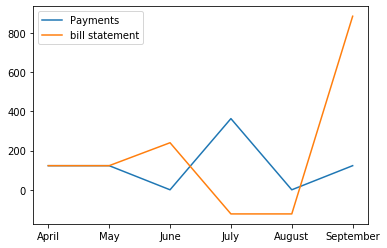

In [160]:
xlabels = ['April', 'May', 'June', 'July', 'August', 'September']
plt.plot(xlabels,payments_test,label='Payments');
plt.plot(xlabels,bill_test,label='bill statement');
plt.legend();
plt.show()

In [114]:



y = $$

two lines, bill statement; paymenmt amount



xaxis. sep, jun, jul aug sep

1184

In [99]:
raw_data[(raw_data['BILL_AMT1']==0) & (raw_data['BILL_AMT2']==0) & (raw_data['BILL_AMT3']==0)]['PAY_0'].value_counts()

 1    589
-2    311
Name: PAY_0, dtype: int64

In [54]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 0 to 22499
Data columns (total 24 columns):
LIMIT_BAL                     22500 non-null int64
SEX                           22500 non-null int64
EDUCATION                     22500 non-null int64
MARRIAGE                      22500 non-null int64
AGE                           22500 non-null int64
PAY_0                         22500 non-null int64
PAY_2                         22500 non-null int64
PAY_3                         22500 non-null int64
PAY_4                         22500 non-null int64
PAY_5                         22500 non-null int64
PAY_6                         22500 non-null int64
BILL_AMT1                     22500 non-null int64
BILL_AMT2                     22500 non-null int64
BILL_AMT3                     22500 non-null int64
BILL_AMT4                     22500 non-null int64
BILL_AMT5                     22500 non-null int64
BILL_AMT6                     22500 non-null int64
PAY_AMT1                

In [84]:
raw_data['PAY_6'].unique()

array([ 2, -2,  0, -1,  3,  5,  7,  6,  8,  4])

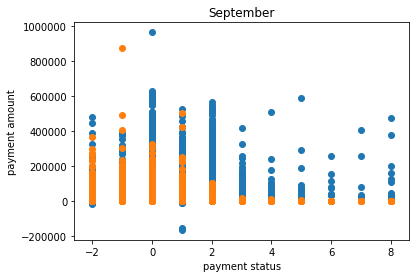

In [85]:
plt.scatter(raw_data['PAY_0'],raw_data['BILL_AMT1']);
plt.scatter(raw_data['PAY_0'],raw_data['PAY_AMT1'])
plt.title('September')
plt.ylabel('payment amount')
plt.xlabel('payment status')
plt.show()

In [60]:
target = raw_data['default payment next month']
features = ['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [35]:
raw_data.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [36]:
raw_data['LIMIT_BAL'].describe()

count      22500.000000
mean      167267.274667
std       129383.700485
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

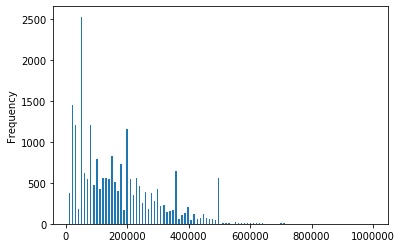

In [44]:
raw_data['LIMIT_BAL'].plot.hist(bins=200)

In [ ]:
raw_data.groupby('LI')

In [13]:
raw_data['MARRIAGE'].value_counts()

2    11942
1    10281
3      236
0       41
Name: MARRIAGE, dtype: int64

In [45]:
raw_data.groupby('SEX')['LIMIT_BAL'].describe()

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
1,8943.0,162841.068993,135440.553559,10000.0,50000.0,130000.0,240000.0,800000.0
2,13557.0,170187.062034,125147.402500,10000.0,70000.0,150000.0,240000.0,1000000.0


### Genders and credit limit

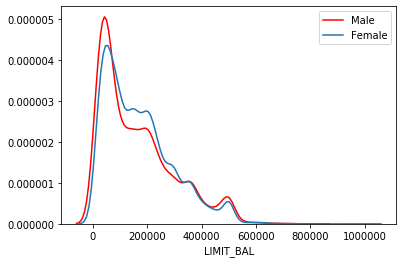

In [82]:
import seaborn as sns
sns.distplot(raw_data[raw_data['SEX'] ==1]['LIMIT_BAL'],hist=False,label='Male',color='red');
sns.distplot(raw_data[raw_data['SEX'] ==2]['LIMIT_BAL'],hist=False,label='Female');
plt.show()

In [4]:
raw_data['EDUCATION'].value_counts()

2    10546
1     7921
3     3690
5      205
4       90
6       35
0       13
Name: EDUCATION, dtype: int64

In [7]:
raw_data.groupby('EDUCATION')[['LIMIT_BAL']].describe()

LIMIT_BAL                                                   \
              count           mean            std      min       25%   
EDUCATION                                                              
0              13.0  206923.076923   80868.681143  50000.0  160000.0   
1            7921.0  211903.800025  135384.548963  10000.0  100000.0   
2           10546.0  147838.611796  120681.991743  10000.0   50000.0   
3            3690.0  125685.008130  112936.089154  10000.0   50000.0   
4              90.0  212555.555556  103690.996338  20000.0  150000.0   
5             205.0  173804.878049  119328.846075  10000.0   80000.0   
6              35.0  134000.000000  121829.195767  10000.0   50000.0   

                                          
                50%       75%        max  
EDUCATION                                 
0          210000.0  250000.0   360000.0  
1          200000.0  300000.0  1000000.0  
2          110000.0  210000.0   800000.0  
3           80000.0  180000.0   760000.0  
4          200000.0  277500.0   510000.0  
5          150000.0  230000.0   550000.0  
6           90000.0  180000.0   540000.0

In [9]:
raw_data[raw_data['EDUCATION'] == 5]['LIMIT_BAL']

13       330000
259      200000
320      120000
443      120000
496      160000
          ...  
22365    350000
22372     50000
22390    230000
22423    180000
22463    230000
Name: LIMIT_BAL, Length: 205, dtype: int64

In [36]:
from itertools import combinations
t_test_results = []
for i in combinations(range(1,7),2):
    a = raw_data[raw_data['EDUCATION'] == i[0]]['LIMIT_BAL']
    b = raw_data[raw_data['EDUCATION'] == i[1]]['LIMIT_BAL'] 
    stat = stats.ttest_ind(a,b)[0]
    p_val = stats.ttest_ind(a,b)[1]
    reject = None
    if p_val > .05: 
        reject = False
    else:
        reject = True
    t_test_results.append((i[0],i[1],stat,p_val,reject))
pd.DataFrame(t_test_results,columns=['GROUP_A', 'GROUP_B','STAT','P_VAL','REJECT?']).sort_values(by='REJECT?').reset_index()

,index,GROUP_A,GROUP_B,STAT,P_VAL,REJECT?
0,2,1,4,-0.045518,9.636955e-01,False
1,8,2,6,0.677254,4.982599e-01,False
2,11,3,6,-0.433200,6.648943e-01,False
3,14,5,6,1.818388,7.026184e-02,False
4,0,1,2,33.875258,4.340156e-244,True
5,1,1,3,33.617990,1.603495e-236,True
6,3,1,5,3.989258,6.686215e-05,True
7,4,1,6,3.398152,6.817553e-04,True
8,5,2,3,9.756016,2.043678e-22,True
9,6,2,4,-5.071399,4.015592e-07,True


In [14]:
import scipy.stats as stats
stats.ttest_ind(raw_data[raw_data['EDUCATION'] == 5]['LIMIT_BAL'],raw_data[raw_data['EDUCATION'] == 0]['LIMIT_BAL'])

Ttest_indResult(statistic=-0.9852916843516252, pvalue=0.32558318985092527)

In [32]:
t_test_results_mar = []
for i in combinations(range(4),2):
    a = raw_data[raw_data['MARRIAGE'] == i[0]]['LIMIT_BAL']
    b = raw_data[raw_data['MARRIAGE'] == i[1]]['LIMIT_BAL'] 
    stat = stats.ttest_ind(a,b)[0]
    p_val = stats.ttest_ind(a,b)[1]
    if p_val > .05: 
        reject = False
    else:
        reject = True
    t_test_results_mar.append((i[0],i[1],stat,p_val,reject))
pd.DataFrame(t_test_results_mar,columns=['GROUP_A', 'GROUP_B','STAT','P_VAL','REJECT?']).sort_values(by='REJECT?')

,GROUP_A,GROUP_B,STAT,P_VAL,REJECT?
1,0,2,-1.026611,3.046242e-01,False
0,0,1,-2.199877,2.783771e-02,True
2,0,3,2.330972,2.047786e-02,True
3,1,2,14.736983,6.351539e-49,True
4,1,3,9.524928,2.014908e-21,True
5,2,3,6.979969,3.105651e-12,True


In [47]:
raw_data['SEX'].value_counts(normalize=True)

2    0.602533
1    0.397467
Name: SEX, dtype: float64

In [33]:
t_test_results_sex = []
for i in combinations(range(1,3),2):
    a = raw_data[raw_data['SEX'] == i[0]]['LIMIT_BAL']
    b = raw_data[raw_data['SEX'] == i[1]]['LIMIT_BAL'] 
    stat = stats.ttest_ind(a,b)[0]
    p_val = stats.ttest_ind(a,b)[1]
    if p_val > .05: 
        reject = False
    else:
        reject = True
    t_test_results_sex.append((i[0],i[1],stat,p_val,reject))
pd.DataFrame(t_test_results_sex,columns=['GROUP_A', 'GROUP_B','STAT','P_VAL','REJECT?']).sort_values(by='REJECT?')

,GROUP_A,GROUP_B,STAT,P_VAL,REJECT?
0,1,2,-4.169281,0.000031,True


In [18]:
raw_data.AGE.describe()

count    22500.000000
mean        35.526000
std          9.231461
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [24]:
raw_data.groupby(by='MARRIAGE').mean()[['AGE','LIMIT_BAL']].round()

,AGE,LIMIT_BAL
MARRIAGE,,
0,37.0,136098.0
1,40.0,181788.0
2,31.0,156224.0
3,43.0,98898.0


In [28]:
raw_data.groupby(by='MARRIAGE')['AGE'].describe()

,count,mean,std,min,25%,50%,75%,max
MARRIAGE,,,,,,,,
0,41.0,37.097561,8.024353,24.0,31.00,37.0,44.0,56.0
1,10281.0,40.073339,8.752624,21.0,34.00,39.0,46.0,79.0
2,11942.0,31.465835,7.573339,21.0,26.00,29.0,35.0,70.0
3,236.0,42.605932,9.449159,22.0,36.75,43.0,49.0,65.0


How many poeple in this dataset defaulted the next month?